In [1]:
import my_plotting
import markers
import importlib
import utils
import covax_constants
import CovidVAX_specific_utils
import GeneModules

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import numpy as np

import warnings
warnings.simplefilter("ignore")

from functools import partial
import scanpy as sc
import anndata

In [2]:
adata = sc.read_h5ad('cDC2-1-c.h5ad')

In [3]:
adata.X = adata.layers['normalized']

In [4]:
adata.obs['subsets'] = pd.Categorical(adata.obs['subsets_2'].map({
    'cDC2': 'cDC2 ISG Low',
    'cDC2 ISG Dim': 'cDC2 ISG Dim',
    'cDC2 ISG High': 'cDC2 ISG High'
}), categories=['cDC2 ISG High', 'cDC2 ISG Dim', 'cDC2 ISG Low'])

In [5]:
palette = {'cDC2 ISG Low': 'sienna', 'cDC2 ISG Dim': 'purple', 'cDC2 ISG High': 'orange'}

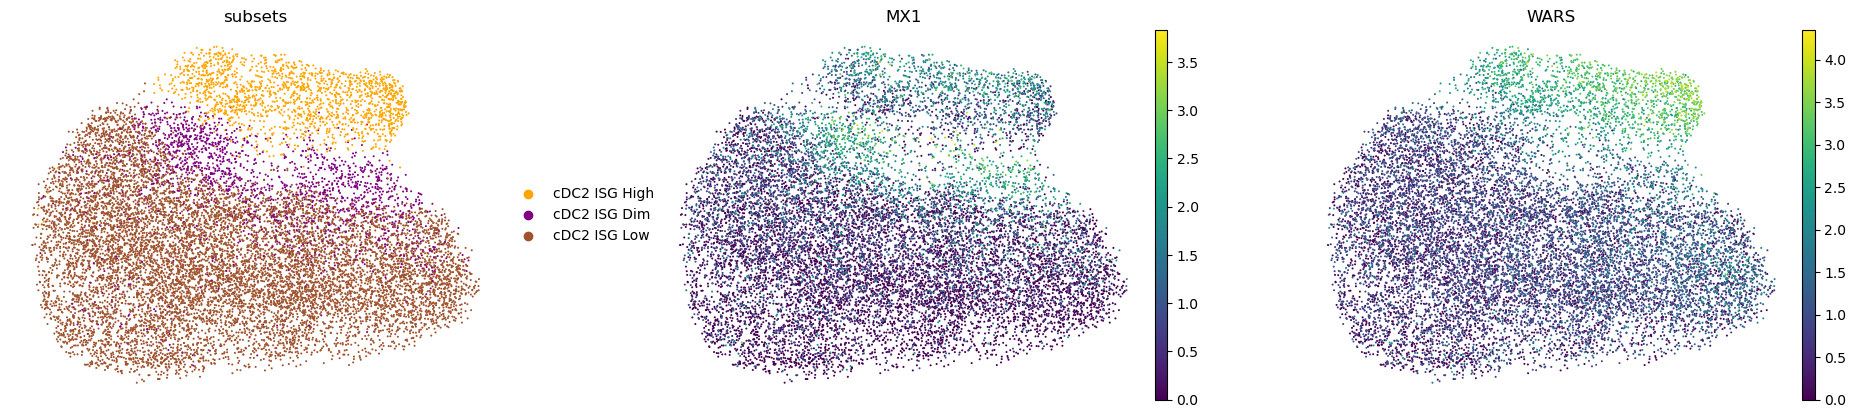

In [6]:
sc.pl.umap(adata, color = ['subsets', 'MX1', 'WARS'], frameon=False, wspace = 0.2, layer='normalized', palette=palette)

In [8]:
inf_genes = GeneModules.InterferonModules.Damiens.all_combined_2021();
inf_genes = [gene for gene in inf_genes if gene in adata.var_names]
adata.obs['IFN Score'] = sc.get.obs_df(adata, inf_genes, use_raw=False, layer='normalized').mean(axis = 1)

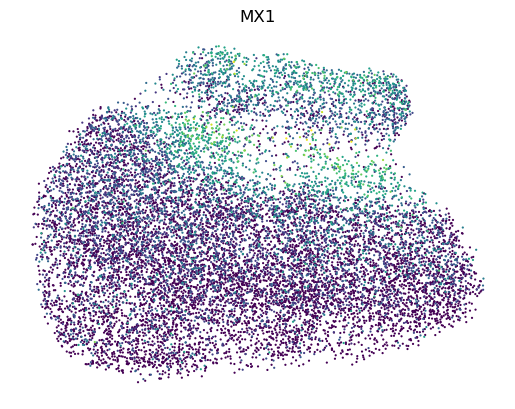

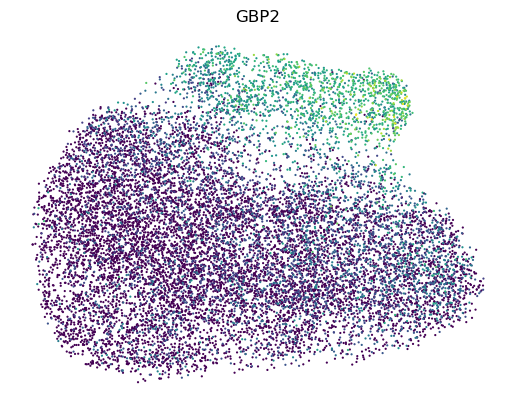

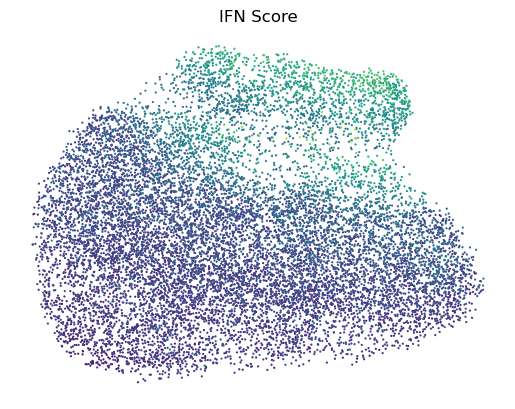

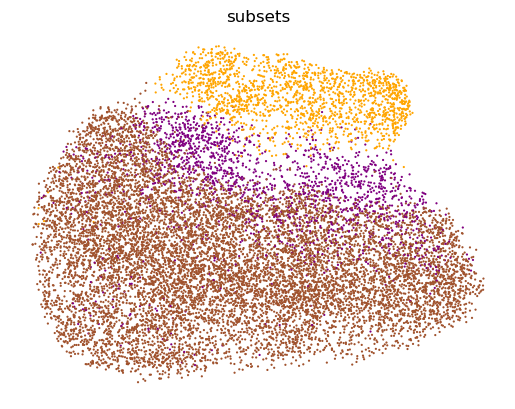

In [11]:
for feature in ['MX1', 'GBP2', 'IFN Score']:
    fig = sc.pl.embedding(adata, color = feature, show=False, frameon=False, 
                          legend_loc=None, colorbar_loc=None, return_fig=True, 
                          layer='normalized', basis=f'X_umap', size = 10)
    
    my_plotting.savefig_png_eps(fig, f'balis_cDC2_featureplot_{feature}', make_folder=True, use_timestamp=False)
    ax = fig.axes[0]
    ax.set_title('');
    plt.show()
    plt.close(fig)

fig = sc.pl.embedding(adata, color = 'subsets', palette=palette, show=False, frameon=False, 
                      legend_loc=None, colorbar_loc=None, return_fig=True, basis=f'X_umap', size = 10)

my_plotting.savefig_png_eps(fig, 'balis_cDC2_featureplot_subsets', make_folder=True, use_timestamp=False)
ax = fig.axes[0]
ax.set_title('');
plt.close(fig)

In [1]:
picked = {
	'High Specific' : ['PSMB9', 'FRMD3', 'DYSF', 'CAMK2D', 'SAMD4A', 'SECTM1', 'FARP2', 'NCF1', 'MYOF', 'APOL3', 'LIMK2', 'GBP1', 'WARS', 'GBP5', 'GBP2', 'LAP3', 'GCH1', 'FCGR1A', 'PSTPIP2', 'PSMA4', 'CALHM6', 'TCF7L2', 'ANKRD22', 'GBP4', 'VAMP5', 'PSME2', 'PSMB10', 'ARID5B', 'BCL2A1', 'PLAC8', 'IFITM3', 'MT2A', 'IL31RA'],
	'High and Dim' : ['ISG15', 'EPSTI1', 'DDX60', 'PARP14', 'PARP9', 'IFIH1', 'STAT2', 'TRIM22', 'RNF213', 'SP110', 'TRIM25', 'CD2AP', 'ZC3HAV1', 'IFI16', 'ADAR', 'SMCHD1'],
	'Dim Specific' : ['IFI44', 'MX1', 'MX2', 'ZCCHC2', 'TENT5A', 'EIF2AK2', 'KIAA1958', 'ITSN1', 'IFI44L', 'COA1', 'DDX58', 'HERC5'],
	'Dim and Low' : ['NLRP12', 'TIAM1', 'PITPNC1', 'S100Z', 'LDLRAD4', 'TRERF1', 'ST6GALNAC3', 'SSBP2', 'CSF3R', 'TMEM71', 'CD99', 'TBC1D9', 'F13A1', 'FAM13A', 'FOXO1', 'PECAM1', 'ZFHX3', 'TREM1', 'RFX2', 'FOSL2', 'CLMN', 'SGMS2'],
}

In [7]:
for key, vals in picked.items():
    print(key, end=' : ')
    print(*vals)
    # for val in vals:
    #     print(val)

High Specific : PSMB9 FRMD3 DYSF CAMK2D SAMD4A SECTM1 FARP2 NCF1 MYOF APOL3 LIMK2 GBP1 WARS GBP5 GBP2 LAP3 GCH1 FCGR1A PSTPIP2 PSMA4 CALHM6 TCF7L2 ANKRD22 GBP4 VAMP5 PSME2 PSMB10 ARID5B BCL2A1 PLAC8 IFITM3 MT2A IL31RA
High and Dim : ISG15 EPSTI1 DDX60 PARP14 PARP9 IFIH1 STAT2 TRIM22 RNF213 SP110 TRIM25 CD2AP ZC3HAV1 IFI16 ADAR SMCHD1
Dim Specific : IFI44 MX1 MX2 ZCCHC2 TENT5A EIF2AK2 KIAA1958 ITSN1 IFI44L COA1 DDX58 HERC5
Dim and Low : NLRP12 TIAM1 PITPNC1 S100Z LDLRAD4 TRERF1 ST6GALNAC3 SSBP2 CSF3R TMEM71 CD99 TBC1D9 F13A1 FAM13A FOXO1 PECAM1 ZFHX3 TREM1 RFX2 FOSL2 CLMN SGMS2


In [10]:
filtered = {}
for key, vals in picked.items():
    filtered[key] = []
    for val in vals:
        if val in adata.var_names:
            filtered[key].append(val)
        else:
            print(val)

FAM13A


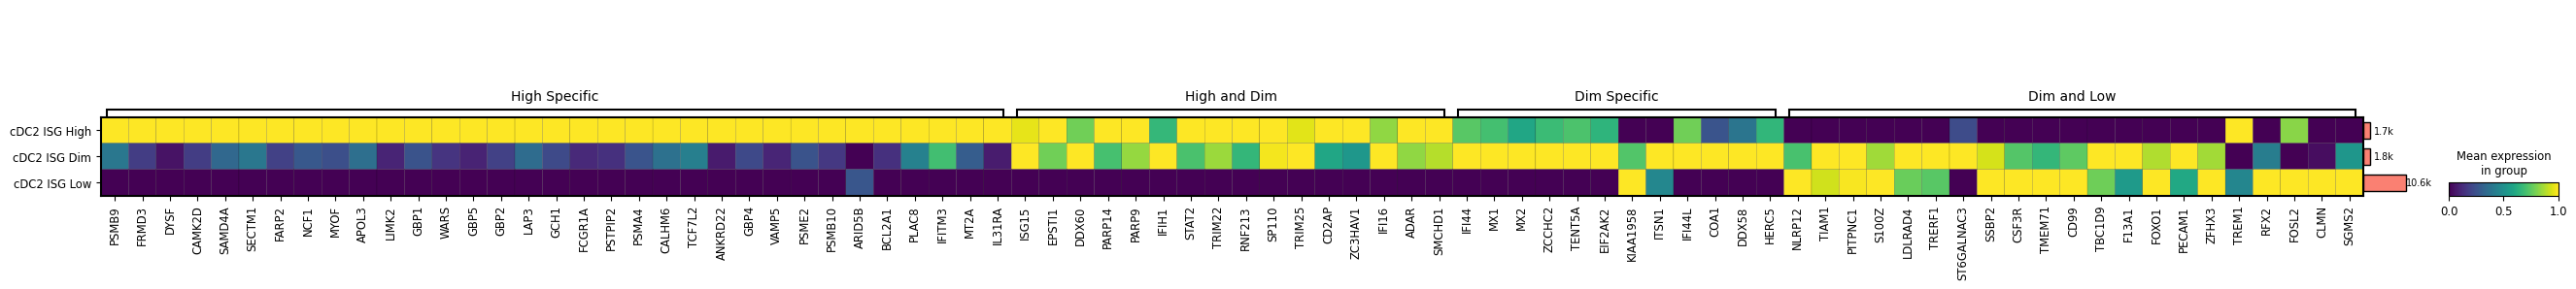

In [11]:
mp = sc.pl.matrixplot(adata, 
              filtered, 
              groupby = 'subsets', 
              var_group_rotation = 0,
              standard_scale = 'var',
              return_fig=True,
             )

mp.add_totals().style(edge_color='black').show()
fig = mp.fig
# my_plotting.savefig_png_eps(fig, 'cDC2_subsets_isg_matrixplot_2', make_folder=True, use_timestamp=False)

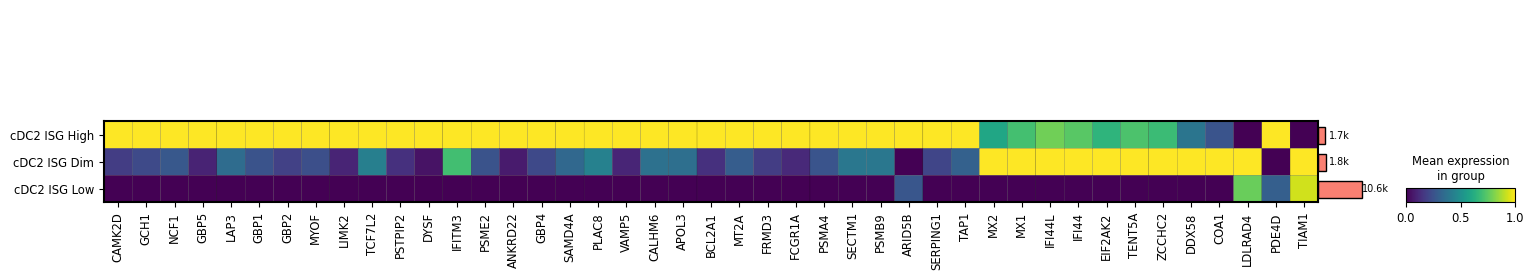

In [33]:
mp = sc.pl.matrixplot(adata, 
              GeneModules.InterferonModules.Manual.CD14_heatmap_24_09_12, 
              groupby = 'subsets', 
              standard_scale = 'var',
              return_fig=True
             )

mp.add_totals().style(edge_color='black').show()
fig = mp.fig
my_plotting.savefig_png_eps(fig, 'cDC2_subsets_isg_matrixplot_1', make_folder=True, use_timestamp=False)

In [28]:
import better_plotting
importlib.reload(better_plotting);

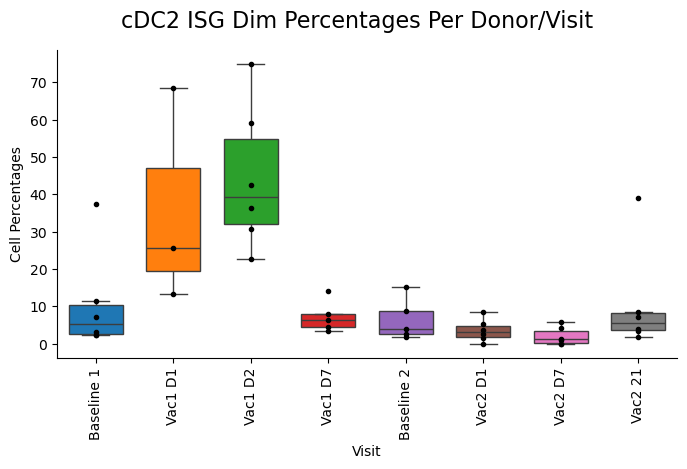

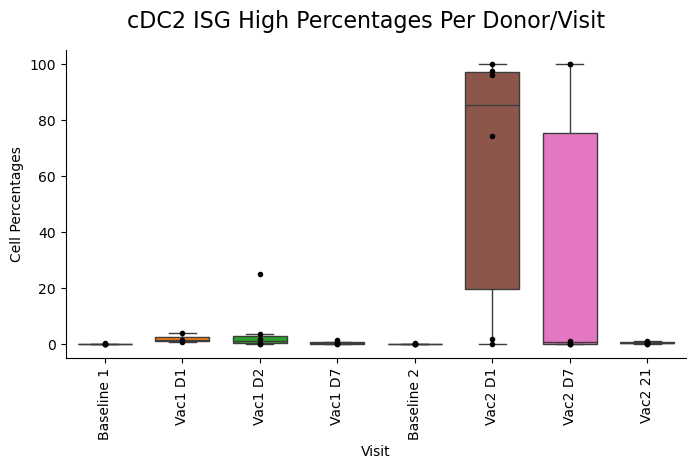

In [30]:
fig = better_plotting.cell_proportions_longitudinal_box_plot_2(adata, 'cDC2 ISG Dim', 'subsets');
my_plotting.savefig_png_eps(fig, 'cDC2_isg_dim_perc_long_plot', make_folder=True, use_timestamp=False);

fig = better_plotting.cell_proportions_longitudinal_box_plot_2(adata, 'cDC2 ISG High', 'subsets');
my_plotting.savefig_png_eps(fig, 'cDC2_isg_high_perc_long_plot', make_folder=True, use_timestamp=False);